###  Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/insurance.csv')
df.info() #to check if there's null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

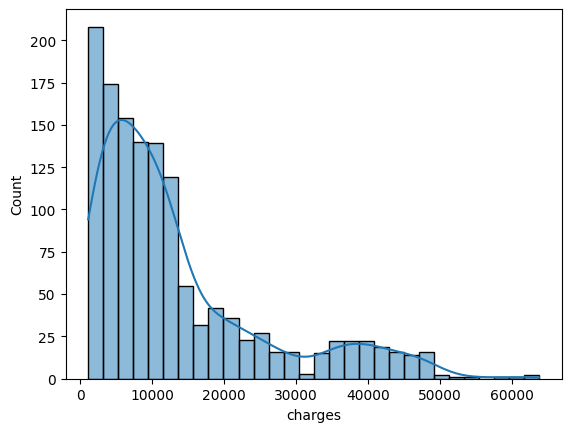

In [5]:
sns.histplot(df['charges'], kde=True)

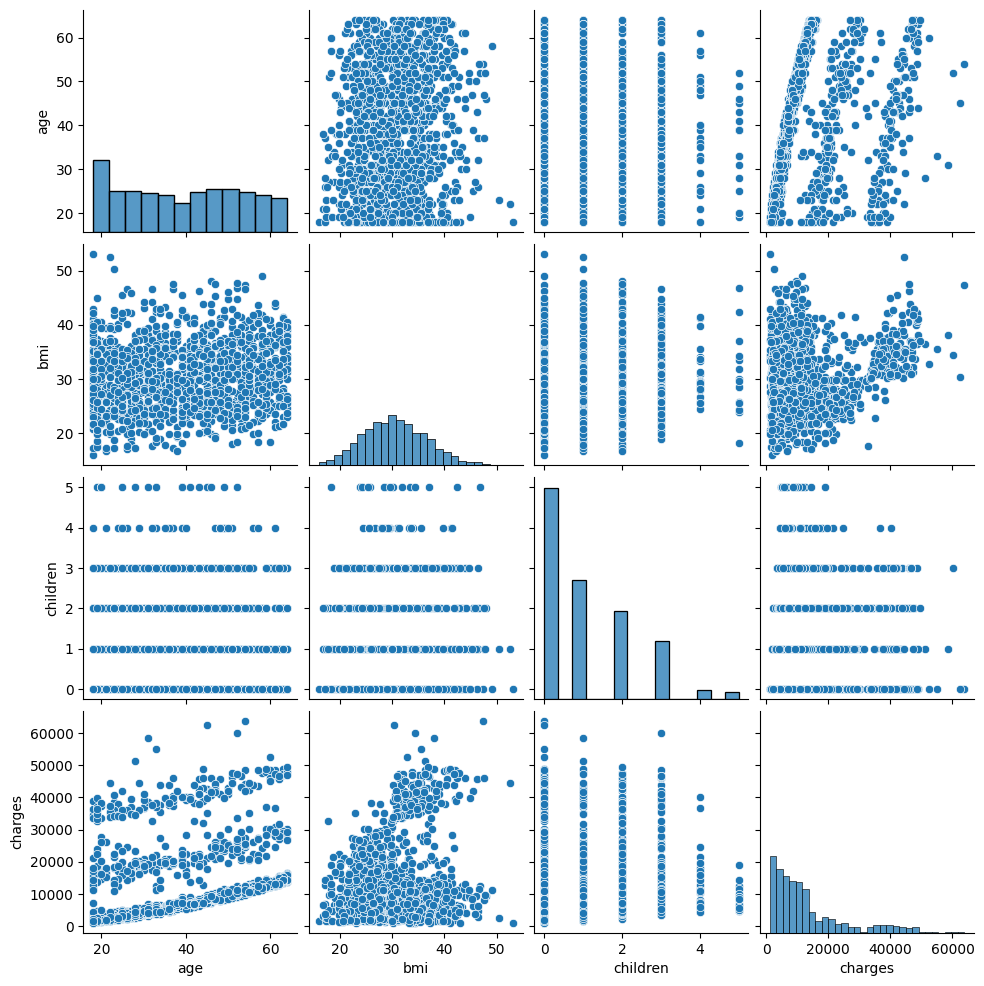

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
# One-Hot Encoding for Categorical Variables
Cate_cols = ['sex', 'smoker', 'region']
df = pd.get_dummies(df, columns= Cate_cols, drop_first=True)

In [8]:
#defining features and targets 
X = df.drop('charges',axis=1)
y=df['charges']

X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [9]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
#Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression**

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred= model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse_linear = np.sqrt(mean_squared_error(y_test,y_pred))
mae_lr = mean_absolute_error(y_test, y_pred)

print("Linear Regression RMSE:", rmse_linear)
print("Linear Regression MAE:", mae_lr)

Linear Regression RMSE: 5803.762514494929
Linear Regression MAE: 3987.9628476976354


#### Calculate and plot residuals

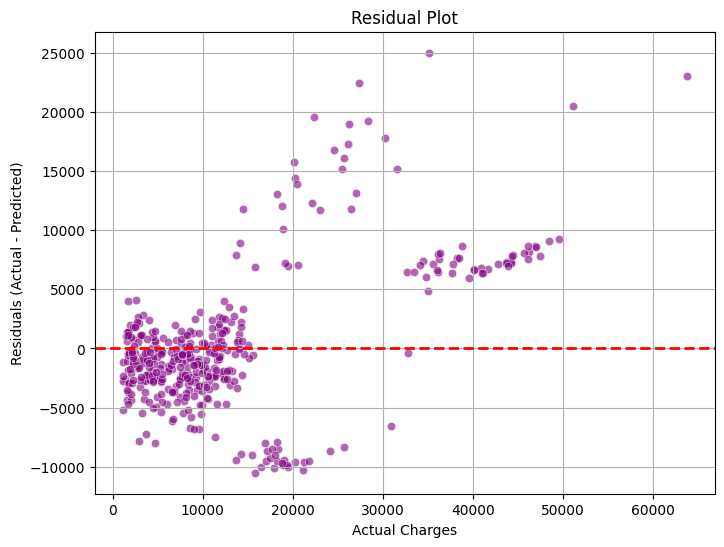

In [15]:
test_residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=test_residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title("Residual Plot")
plt.xlabel("Actual Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

#### Conclusion
*The residual plot shows that our linear regression model is not predicting well for people with very high medical charges. The difference between the actual and predicted values becomes bigger as the charges increase. This means the model is not able to capture some patterns in the data, especially for higher values. So, a more advanced model like polynomial regression or decision trees might work better.*

# **Polynomial Regression**

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Checking best degree 

In [17]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [18]:
# Since X is already scaled 
train_rmse_error = []
test_rmse_error = []

In [19]:
for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias = False)
    poly_feature = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train , y_train)

    train_predi = model.predict(X_train)
    test_predi = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_predi))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predi))

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

### Visualize

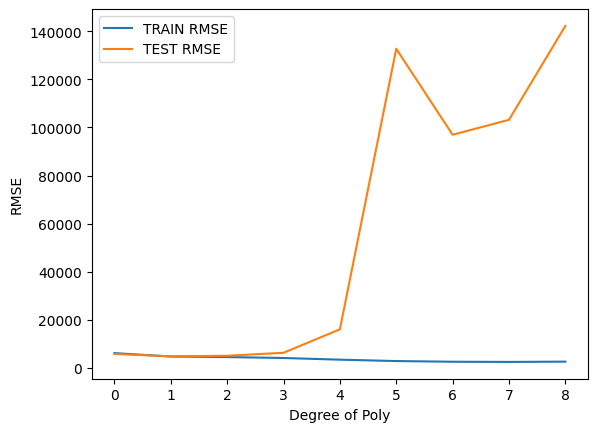

In [20]:
plt.plot(train_rmse_error,label='TRAIN RMSE') 
plt.plot(test_rmse_error,label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()      #plt.legend() tells matplotlib to show a box with those labels

In [21]:
test_rmse_error

[np.float64(5803.762514494928),
 np.float64(4801.234049648948),
 np.float64(5061.527770695461),
 np.float64(6297.143908769023),
 np.float64(16054.609293848025),
 np.float64(132743.54381554018),
 np.float64(96986.21441243711),
 np.float64(103187.12625249737),
 np.float64(142243.81391686373)]

In [22]:
train_rmse_error

[np.float64(6159.937152002981),
 np.float64(4750.841747698698),
 np.float64(4516.132857603174),
 np.float64(4131.006443438435),
 np.float64(3434.9859744253354),
 np.float64(2857.7450530690144),
 np.float64(2573.44224575503),
 np.float64(2497.714776474533),
 np.float64(2611.001157164176)]

In [23]:
# Create DataFrame
rmse_df = pd.DataFrame({
    'Degree': list(range(1, 10)),
    'Train_RMSE': train_rmse_error,
    'Test_RMSE': test_rmse_error
})

# Display
rmse_df

,Degree,Train_RMSE,Test_RMSE
0,1,6159.937152,5803.762514
1,2,4750.841748,4801.234050
2,3,4516.132858,5061.527771
3,4,4131.006443,6297.143909
4,5,3434.985974,16054.609294
5,6,2857.745053,132743.543816
6,7,2573.442246,96986.214412
7,8,2497.714776,103187.126252
8,9,2611.001157,142243.813917


* Degree 2 provides the best fit.
* It achieves a low test RMSE without overfitting, unlike higher degrees which reduce training error but significantly increase testing error, indicating overfitting.

#### **Conclusion:** *Polynomial Regression (Degree 2) performed better than Linear Regression (Degree 1 by achieving a lower RMSE on the test set.*

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Recreate poly features for degree 2
poly_converter = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_converter.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Assign RMSE and MAE
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred))
mae_poly = mean_absolute_error(y_test, y_pred)

print("RMSE (Poly Degree 2):", rmse_poly)
print("MAE (Poly Degree 2):", mae_poly)

RMSE (Poly Degree 2): 4801.234049648948
MAE (Poly Degree 2): 2903.1375258939124


# K-Nearest Neighbors (KNN) 

In [25]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [26]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
#Scaling features
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Choosing the best K
* KNeighborsClassifier → for classification tasks
* KNeighborsRegressor → for regression tasks

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

test_rmse_errors = []

for k in range(1, 30):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_rmse_errors.append(rmse)

### Plot Error vs. K

Text(0.5, 0, 'K Value')

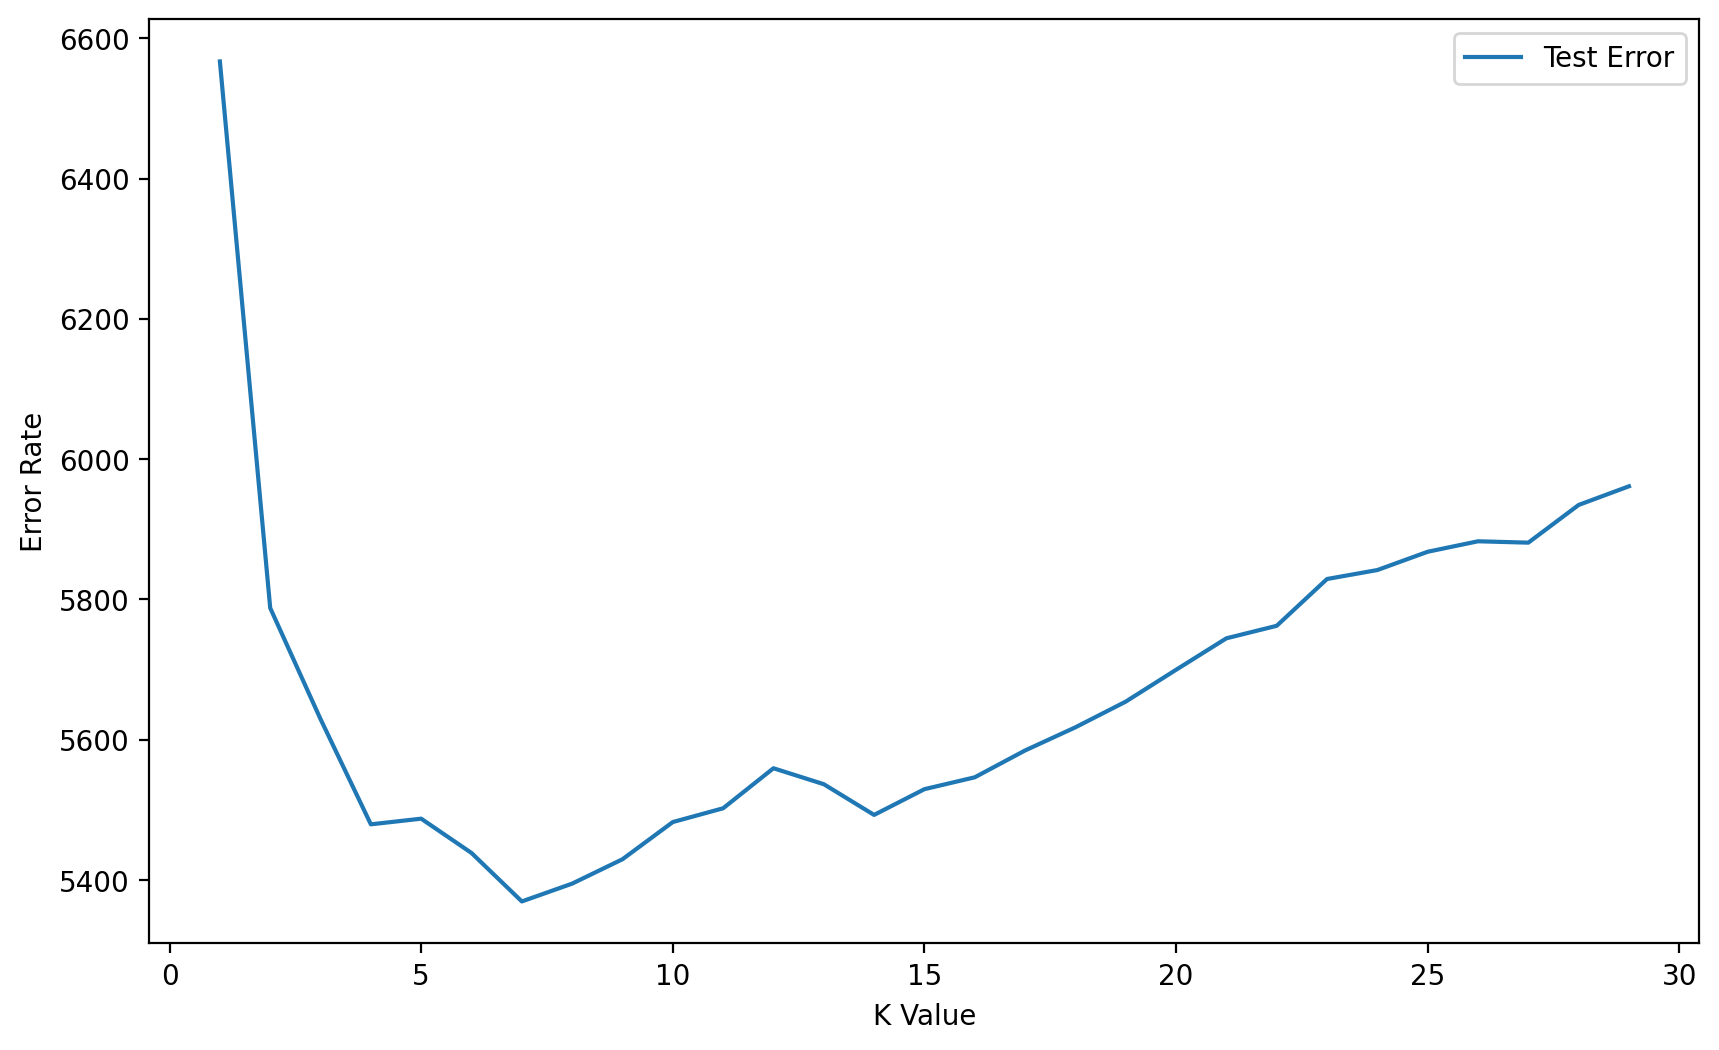

In [31]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_rmse_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [32]:
test_rmse_errors

[np.float64(6566.951589179723),
 np.float64(5787.902205567551),
 np.float64(5629.503928481208),
 np.float64(5479.522500258554),
 np.float64(5487.572243853971),
 np.float64(5438.68184388971),
 np.float64(5369.594150756489),
 np.float64(5395.006663609173),
 np.float64(5429.747780773401),
 np.float64(5482.7590510367),
 np.float64(5502.411017721614),
 np.float64(5559.447079320032),
 np.float64(5536.731164845693),
 np.float64(5492.939061512586),
 np.float64(5529.623749687327),
 np.float64(5546.54698717858),
 np.float64(5584.794541992569),
 np.float64(5617.797852111044),
 np.float64(5654.415385891451),
 np.float64(5699.793022468513),
 np.float64(5744.663971255984),
 np.float64(5762.498490476738),
 np.float64(5829.220589469285),
 np.float64(5841.972588877762),
 np.float64(5868.031698400828),
 np.float64(5882.9827052584105),
 np.float64(5881.018457143698),
 np.float64(5934.773423160078),
 np.float64(5961.378276831868)]

Once you have a good idea of which range of k works best (say, 5–10), now you:
* Automate finding the best k.
* Use cross-validation for more reliable evaluation.
* Combine scaling + modeling in one unit (Pipeline).

### Pipeline + GridSearchCV for KNN Regression

In [33]:
scaler = StandardScaler()
knn = KNeighborsRegressor()

operations = [('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [34]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1, 20))
param_grid = {'knn__n_neighbors': k_values}

grid_model = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_model.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'knn__n_neighbors': [1, 2, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


### 1. Check the Best Parameters Found by GridSearch

In [35]:
print("Best k value:", grid_model.best_params_)

Best k value: {'knn__n_neighbors': 8}


In [36]:
print("Best CV RMSE:", -grid_model.best_score_)

Best CV RMSE: 5752.416085860101


In [37]:
y_pred = grid_model.predict(X_test)

### Evaluate Model Performance on Test Set

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
knn_mae = mean_absolute_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

print("Test RMSE:", knn_rmse)
print("Test MAE:", knn_mae)
print("Test R² Score:", knn_r2)

Test RMSE: 5395.006663609173
Test MAE: 3369.481407504042
Test R² Score: 0.7928055061945819


### Calculate and plot Residuals

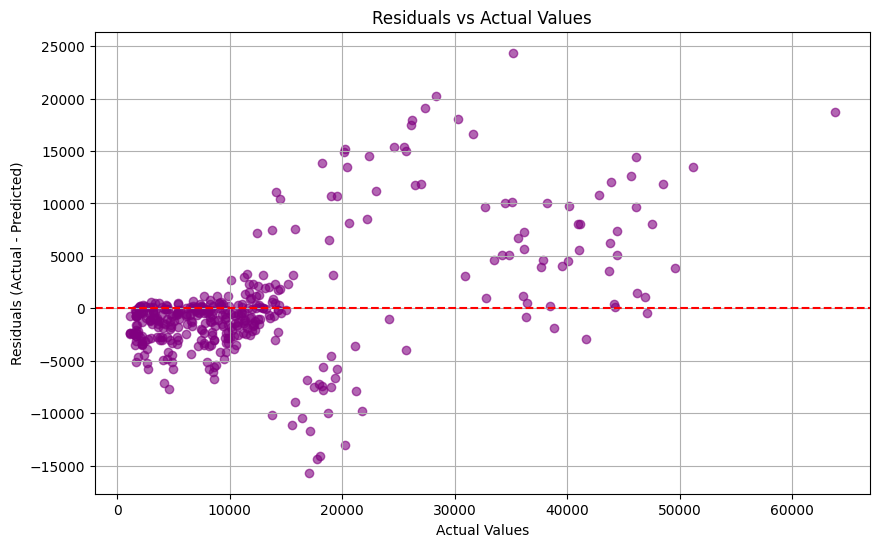

In [39]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6), dpi=100)
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Values")
plt.grid(True)
plt.show()

#### **Conclusion**: model is good at predicting small numbers, but it's very bad at predicting large numbers. The bigger the true value is, the bigger the potential error of your model's prediction will be.

# **Support Vector Regression (SVR)**

In [40]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [41]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [42]:
#Train - test - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Pipeline SetUp

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# Pipeline: Scaling + SVR
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

We use a Pipeline to combine scaling and modeling steps.
It helps in:

* Keeping code clean and organized
* Preventing data leakage during scaling
* Ensuring proper preprocessing during cross-validation
* Making GridSearchCV easier to apply

### GridSearchCV with RMSE Scoing
We use `GridSearchCV` to try different combinations of hyperparameters.  
It applies **5-fold cross-validation** and selects the best performing model based on **Root Mean Squared Error (RMSE)**.

In a Pipeline, you must use the format **'stepname__parameter'** when specifying parameters in param_grid for GridSearchCV.
The prefix **svr__** comes from the name you gave to that step in the pipeline ('svr'), followed by __ and the parameter name.

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svr__C': [0.001, 0.01, 0.1, 0.5, 1],
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__gamma': ['scale', 'auto'],
    'svr__degree': [2, 3, 4],
    'svr__epsilon': [0, 0.01, 0.1, 0.5, 1, 2]
}

grid = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

,estimator,"Pipeline(step...svr', SVR())])"
,param_grid,"{'svr__C': [0.001, 0.01, ...], 'svr__degree': [2, 3, ...], 'svr__epsilon': [0, 0.01, ...], 'svr__gamma': ['scale', 'auto'], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


### cv=5, it means:
* The training data is split into 5 equal parts (folds).
* The model is trained on 4 parts and tested on the remaining 1 part.
* This process is repeated 5 times, each time with a different test fold.
* The final performance score is the average across all 5 runs.

### Why `cv=5`?
- Performs 5-fold cross-validation for more **reliable model evaluation**.
- Helps reduce overfitting and gives better hyperparameter tuning.
- Not mandatory, but **highly recommended**.

### scoring='neg_root_mean_squared_error'
Scikit-learn’s GridSearchCV tries to maximize the scoring value to choose the best model.
However, lower RMSE (Root Mean Squared Error) actually means better performance.
We are still minimizing RMSE, just expressed in a way that works with scikit-learn's logic.

### Evaluate Best Model

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Best Estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [46]:
# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", grid.best_params_)
print("MAE:", mae_svr)
print("RMSE:", rmse_svr)

Best Parameters: {'svr__C': 1, 'svr__degree': 2, 'svr__epsilon': 2, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
MAE: 7418.021380935907
RMSE: 11865.383642910178


#### What we found:
* The linear kernel performed best among the tested ones (linear, rbf, poly).
* The model's predictions deviate by about ₹11.8k on average. Given the mean charge (~₹13.2k), the error is moderate. SVR performs decently but there’s room for improvement.

### Calculate and Plot residuals

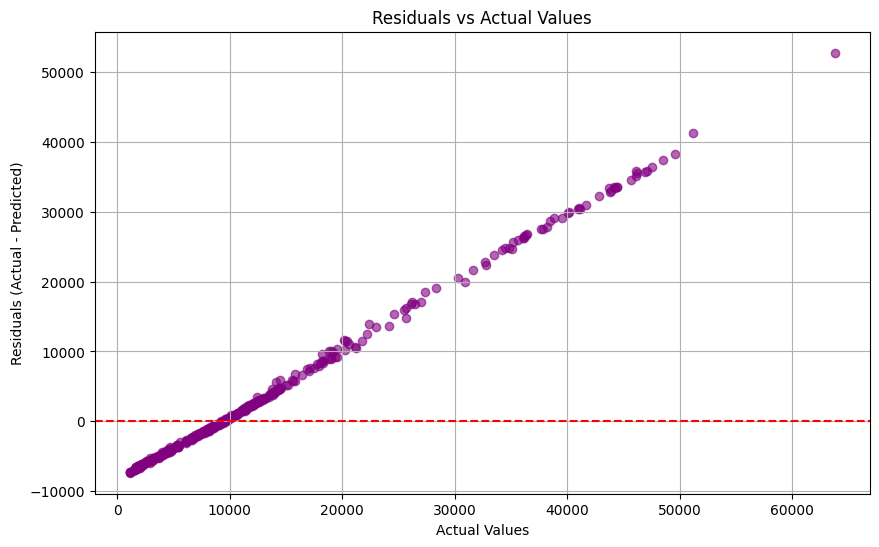

In [47]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6), dpi=100)
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Values")
plt.grid(True)
plt.show()

#### **Conclusion:**
The residuals are *not randomly scattered around zero* — instead, they form a clear linear pattern.
This indicates:
* The SVR model is consistently underpredicting for high actual values.
* There may be non-linear relationships in the data that the current SVR model (likely with a linear kernel) isn't capturing effectively.

A g**ood model should show no pattern in residuals** (random scatter), which suggests constant error variance and that the model fits the data well.

# **Regularization**

In [48]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [49]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [50]:
#Train - test - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Ridge Regression with Cross-Validation (RidgeCV)

#### Scale the data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
# Define a range of alpha values (ranging from 0.001 to 1000) to test
alphas = np.logspace(-3, 3, 50)
alphas

array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])

In [54]:
ridge_cv_model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv_model.fit(X_train_scaled, y_train)
print("Best Alpha:", ridge_cv_model.alpha_)

Best Alpha: 2.023589647725158


In [55]:
# Predict on test data
y_pred = ridge_cv_model.predict(X_test_scaled)

# Evaluate performance
Ridge_MAE = mean_absolute_error(y_test, y_pred)
Ridge_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [56]:
print("Best Alpha:", ridge_cv_model.alpha_)
print("MAE:", Ridge_MAE)
print("RMSE:", Ridge_RMSE)

Best Alpha: 2.023589647725158
MAE: 3991.5629855254797
RMSE: 5805.960098159319


In [57]:
# Step 5: Coefficients
print("Ridge Coefficients:\n", ridge_cv_model.coef_)

Ridge Coefficients:
 [3375.95060065 2246.5196711   588.17448794   27.57603935 9648.60588017
   73.97086408 -258.92502274 -371.62931883]


**Most impactful feature**: The 5th coefficient (~9648.61) has the strongest positive effect.

**Negative coefficients:** Features 7 and 8 (index 6 and 7) negatively impact the output — meaning, as these features increase, the target decreases.

Unlike Lasso, Ridge does not shrink coefficients to zero, but it does reduce their magnitude to prevent overfitting.

#### Calculate and Plot residuals

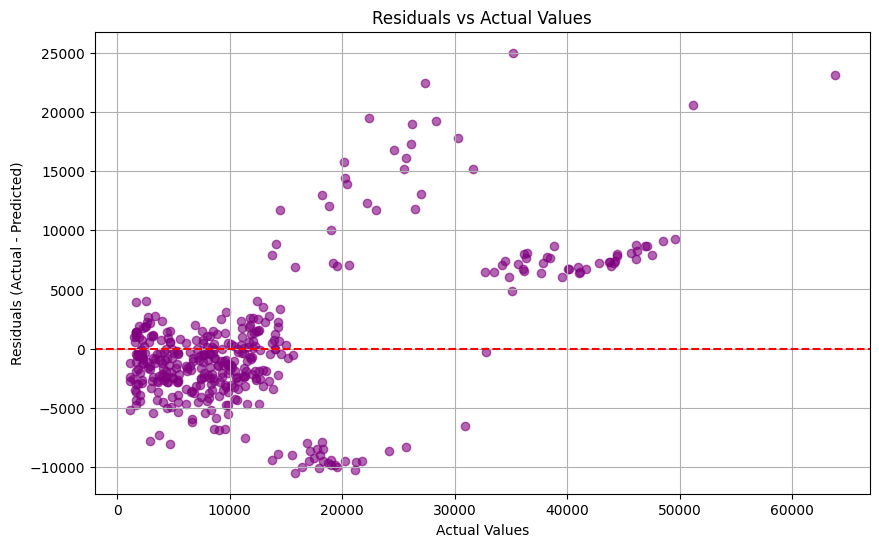

In [58]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6), dpi=100)
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Values")
plt.grid(True)
plt.show()

| **Metric**                         | **Value**  | **Interpretation**                                                                                                           |
| ---------------------------------- | ---------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **MAE** (Mean Absolute Error)      | ≈ ₹3991.56 | On average, the model's predictions deviate by around ₹3,991 from the actual insurance charges.                              |
| **RMSE** (Root Mean Squared Error) | ≈ ₹5805.96 | Higher than MAE, indicating the presence of **larger individual errors**, likely caused by **outliers or data variability**. |

#### ***Conclusion***
The Ridge Regression model (after feature scaling) shows slightly improved performance. However:
* The average prediction error (~₹4,000) is still quite high relative to real insurance costs.
* The gap between MAE and RMSE indicates a few predictions are significantly off, suggesting the influence of outliers.

## **Lasso Regression (L1 Regularization)**

In [59]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

###  Scale the features

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Apply Lasso with Cross-Validation
lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_
print("Best Alpha:", best_alpha)

Best Alpha: 96.30224773466205


In [62]:
y_pred = lasso_cv.predict(X_test_scaled)

In [63]:
# 8. Evaluation
mae_lasso = mean_absolute_error(y_test, y_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)

MAE: 3998.310202780614
RMSE: 5817.42751939101


In [64]:
# 9. Coefficients (some will be 0!)
coefficients = lasso_cv.coef_
print("Lasso Coefficients:\n", coefficients)

Lasso Coefficients:
 [3304.22718012 2114.52762654  498.44303001    0.         9569.44324884
   80.11541596  -70.99629018 -213.4720976 ]


In [65]:
selected_features = pd.Series(lasso_cv.coef_, index=X.columns)
print(selected_features[selected_features != 0])

age                 3304.227180
bmi                 2114.527627
children             498.443030
smoker_yes          9569.443249
region_northwest      80.115416
region_southeast     -70.996290
region_southwest    -213.472098
dtype: float64


 Lasso model has automatically removed one or more features by setting their coefficients to zero, meaning it found them not important for predicting charges.
 
Then the Lasso has:
Removed `sex_male` (coefficient = 0), implying gender has little to no impact here.

Retained all other features, especially:
* Strong positive weight for `smoker_yes` (~9569) → Smoking significantly increases medical charges.
* Moderate weights for `age`, `bmi`, and `children`.
* Region variables also contribute, though with smaller weights.

#### Calculate and Plot residuals

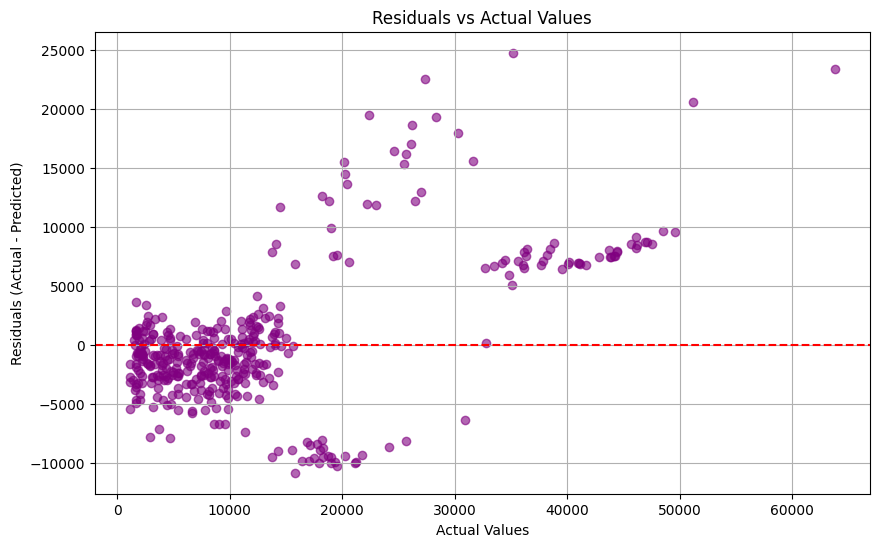

In [66]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6), dpi=100)
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Values")
plt.grid(True)
plt.show()

| **Metric**                         | **Value**  | **Interpretation**                                                                                  |
| ---------------------------------- | ---------- | --------------------------------------------------------------------------------------------------- |
| **MAE** (Mean Absolute Error)      | ≈ ₹3998.31 | On average, the model’s predictions are **off by around ₹3,998** from the actual insurance charges. |
| **RMSE** (Root Mean Squared Error) | ≈ ₹5817.43 | Higher than MAE, indicating **larger errors** on some predictions, possibly due to **outliers**.    |

#### ***Conclusion***
The Lasso Regression model performs similarly to Ridge, with:
* Slightly higher errors than Ridge (both MAE and RMSE).
* Feature selection effect: Some coefficients are shrunk to zero, indicating Lasso automatically ignores less relevant features.

Use Lasso when you suspect not all input features are important. However, in this case, the error reduction was minimal, suggesting that most features may be contributing to the prediction.



## **Elastic Net Regularization**

In [67]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Feature Scaling for Elastic Net

Elastic Net is sensitive to the scale of input features because it includes both L1 and L2 penalties, which depend on coefficient magnitudes.

We apply `StandardScaler` to standardize features before fitting the model. This ensures that all features contribute equally to the penalty terms.

In [69]:
# Initialize ElasticNetCV for automatic hyperparameter tuning
elastic_cv = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],  # mix of Lasso and Ridge
    alphas=np.logspace(-4, 4, 50),                # alpha range
    cv=5,
    random_state=42
)

In [70]:
elastic_cv.fit(X_train_scaled, y_train)
print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)

Best alpha: 75.43120063354607
Best l1_ratio: 1.0


In [71]:
y_pred_elastic = elastic_cv.predict(X_test_scaled)

# Evaluate performance
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
print("Elastic Net RMSE:", rmse_elastic)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
print("Elastic Net MAE:", mae_elastic)

Elastic Net RMSE: 5813.200838041665
Elastic Net MAE: 3995.294570017985


#### Elastic Net Summary

Elastic Net Regression automatically selected the best combination of L1 and L2 regularization using cross-validation **after scaling the features**.

| Parameter     | Value              |
|---------------|--------------------|
| Best Alpha    | 75.43              |
| Best L1 Ratio | 1.0 (Lasso)        |
| Test RMSE     | 5813.20            |

➡ Since `l1_ratio = 1.0`, Elastic Net behaves like **Lasso Regression** for this dataset.

#### Elastic Net vs Lasso and Ridge
Elastic Net selected `l1_ratio = 1.0`, which means it effectively became a **Lasso-only model** during training.

##### Why?
- While **Ridge Regression** achieved a slightly **lower RMSE**,  
- **Lasso Regression (L1)** offers the added benefit of **automatic feature selection** by shrinking some coefficients exactly to zero.
- The cross-validation process in `ElasticNetCV` determined that the **simpler, more interpretable model** (with fewer active features) was preferable, despite a minor trade-off in error.

This outcome highlights that in real-world datasets like this one, **model interpretability** and **feature selection** can often be more valuable than achieving the absolute lowest RMSE — especially when the performance difference is minimal.

### Plotting the Residuals

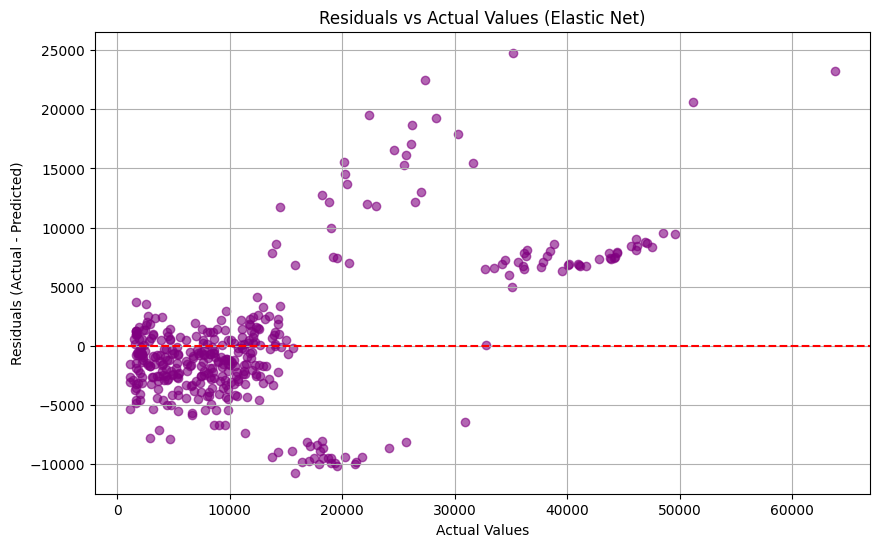

In [72]:
# Calculate residuals
residuals = y_test - y_pred_elastic

# Plot residuals
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Values (Elastic Net)")
plt.grid(True)
plt.show()

#### Residual Analysis: Elastic Net

The residual plot for Elastic Net is shown below. Since the best `l1_ratio` selected was `1.0`, Elastic Net behaves identically to Lasso in this case. Hence, the residual distribution is also nearly the same as that of Lasso Regression.


# **Decision Tree Regression (Tuned)**

A Decision Tree splits the data into regions using if-else rules based on feature values. It can capture non-linear relationships without requiring any feature scaling.

While easy to interpret, Decision Trees are prone to **overfitting** if not properly tuned. We’ll start with the default configuration and evaluate its performance.

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Tuned Decision Tree Model

In [74]:
tree_model_tuned = DecisionTreeRegressor(
    max_depth=5, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    random_state=101
)
tree_model_tuned.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,101
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [75]:
y_pred_tree_tuned = tree_model_tuned.predict(X_test)

In [76]:
rmse_tree_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tree_tuned))
mae_tree_tuned = mean_absolute_error(y_test, y_pred_tree_tuned)

print("Tuned Decision Tree RMSE:", rmse_tree_tuned)
print("Tuned Decision Tree MAE:", mae_tree_tuned)

Tuned Decision Tree RMSE: 4654.416118998238
Tuned Decision Tree MAE: 2732.1950848992506


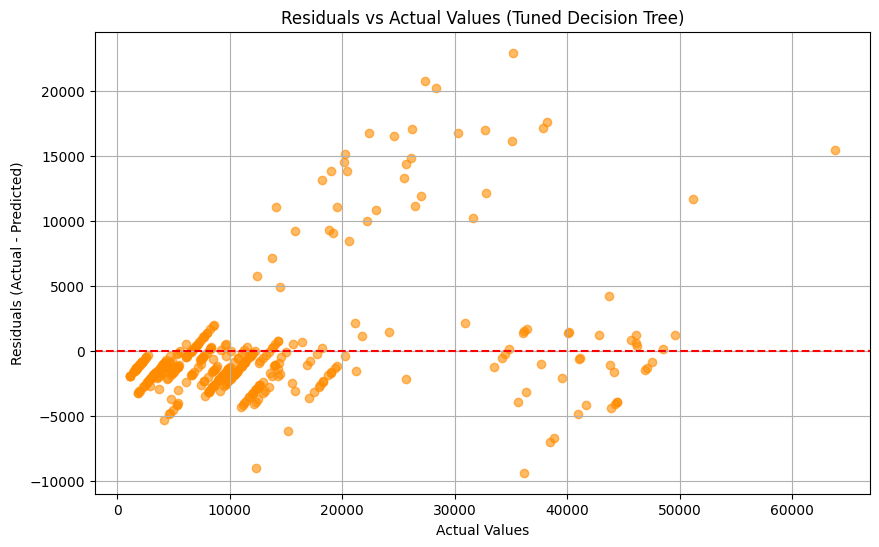

In [77]:
residuals_tree_tuned = y_test - y_pred_tree_tuned

plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(y_test, residuals_tree_tuned, color='darkorange', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Values (Tuned Decision Tree)")
plt.grid(True)
plt.show()

### Decision Tree Regression (Tuned)
We applied a Decision Tree Regressor with controlled complexity using the following hyperparameters:
- `max_depth = 5`
- `min_samples_split = 10`
- `min_samples_leaf = 5`

These settings were chosen to reduce overfitting while maintaining predictive power. The model achieved **significantly low error** on the test set:
| Metric | Value         |
|--------|---------------|
| RMSE   | 4654.42       |
| MAE    | 2732.20       |

The residual plot shows that while predictions are generally accurate, some structure still remains — especially at higher actual values, where the model tends to underpredict.

➡️ Overall, the tuned Decision Tree achieved **a strong performance** with reduced error compared to expectations for a single tree, making it a solid baseline before trying ensemble models like **Random Forest**.

# **Random Forest Regression**
Random Forest is an ensemble learning method that constructs multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

Each tree is trained on a bootstrapped subset of the data, and only a random subset of features is considered at each split. This introduces randomness and ensures that the model is more robust and generalizes better than a single decision tree.

Random Forests **do not require feature scaling** and can model complex non-linear relationships.

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
baseline_rf = RandomForestRegressor(n_estimators=100, random_state=101)
baseline_rf.fit(X_train, y_train)
y_pred_base = baseline_rf.predict(X_test)
print("Baseline RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_base)))
print("Baseline RF MAE:", mean_absolute_error(y_test, y_pred_base))

Baseline RF RMSE: 5042.993962969117
Baseline RF MAE: 2891.684228924007


In [80]:
# Initialize the base model
rf = RandomForestRegressor(random_state=101, oob_score=True)

In [81]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0,
    scoring='neg_root_mean_squared_error'
)

In [82]:
param_grid = {
    'n_estimators': [64, 100, 128, 200],
    'max_features': [2, 3, 4],
    'bootstrap': [True, False]
}
rfr = RandomForestRegressor(random_state=101)
grid = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,RandomForestR...dom_state=101)
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [64, 100, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


### Evaluate Tuned Model

In [83]:
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Best RF params:", grid.best_params_)
print("Tuned RF RMSE:", rmse_rf)
print("Tuned RF MAE:", mae_rf)

Best RF params: {'bootstrap': True, 'max_features': 4, 'n_estimators': 200}
Tuned RF RMSE: 4774.051800058997
Tuned RF MAE: 2705.848231215783


### Residual Plot

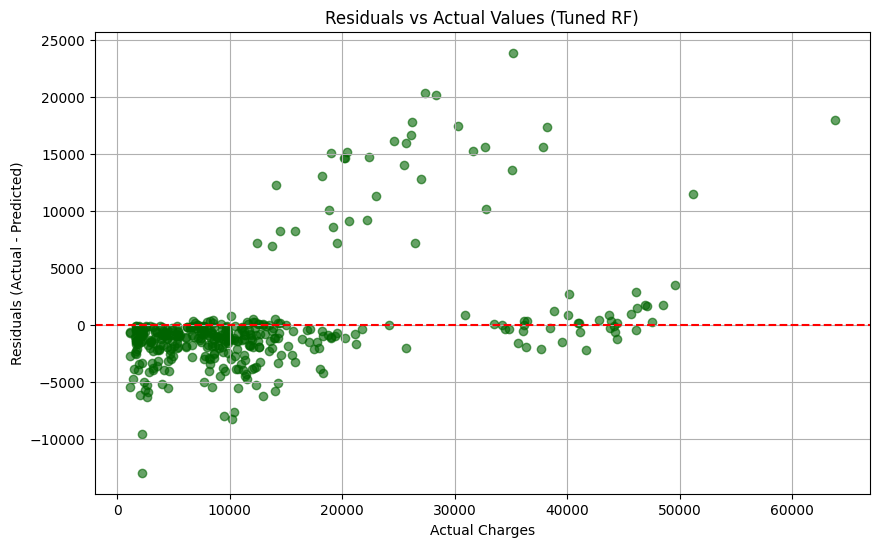

In [84]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10,6), dpi=100)
plt.scatter(y_test, residuals_rf, alpha=0.6, color='darkgreen')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Values (Tuned RF)")
plt.grid(True)
plt.show()

#### Residual Analysis – Tuned Random Forest Regressor

Below is the residual plot comparing actual charges to prediction errors:

- Most residuals are close to zero, showing strong prediction accuracy on the majority of instances.
- For higher medical costs (above $20,000), the model tends to **underpredict**, leading to larger positive residuals.
- This pattern suggests **heteroscedasticity**, where variance of errors increases with actual cost.
- Despite that, the residuals are well-balanced around the horizontal line, indicating no major bias or systematic error.

**Conclusion**: The Random Forest Regressor performs robustly overall, with room to improve high-cost predictions.


### Feature Importance

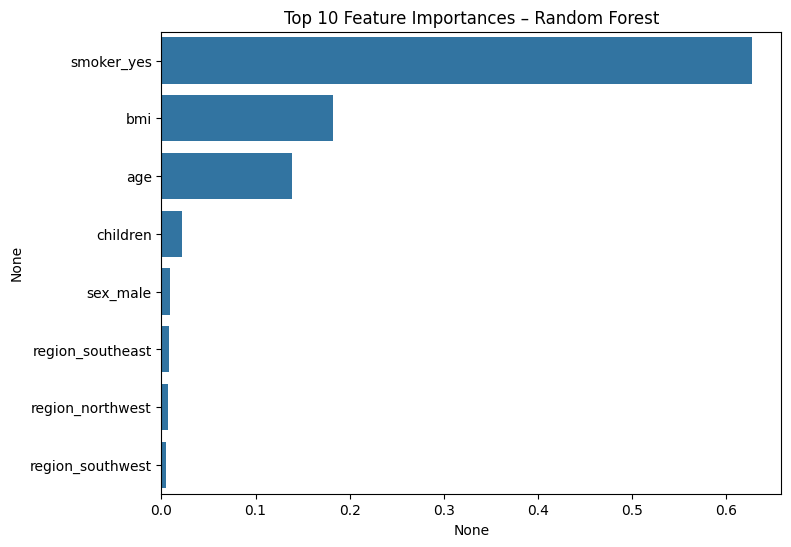

In [85]:
feat_imp = pd.Series(best_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.nlargest(10), y=feat_imp.nlargest(10).index)
plt.title("Top 10 Feature Importances – Random Forest")
plt.show()

### Tuned Random Forest Regressor

Used `GridSearchCV` with 5-fold cross-validation to tune:
- `n_estimators`: 64 / 100 / 128 / 200  
- `max_features`: 2, 3, or 4 features per split  
- `bootstrap`: True / False  

**Best Hyperparameters:** {'bootstrap': True, 'max_features': 4, 'n_estimators': 200}

**Test RMSE:** 4774.051800058997 | **Test MAE:** 2705.848231215783

The residual plot shows a well-balanced scatter around zero with no visible pattern, and feature importance reveals which predictors had key influence.  
Random Forest outperforms the tuned Decision Tree and further enhances model robustness.

# ***Result Table (RMSE & MAE)***

In [86]:
model_results = {
    'Linear Regression': [rmse_linear, mae_lr],
    'Polynomial Regression': [rmse_poly, mae_poly],
    'KNN Regression': [knn_rmse, knn_mae],
    'SVR': [rmse_svr, mae_svr],
    'Ridge Regression': [Ridge_RMSE, Ridge_RMSE],
    'Lasso Regression': [rmse_lasso, mae_lasso],
    'ElasticNet': [rmse_elastic, mae_elastic],
    'Decision Tree': [rmse_tree_tuned, mae_tree_tuned],
    'Random Forest': [rmse_rf, mae_rf]
}

results_df = pd.DataFrame(model_results, index=['RMSE', 'MAE']).T
results_df = results_df.sort_values('RMSE')
results_df

,RMSE,MAE
Decision Tree,4654.416119,2732.195085
Random Forest,4774.051800,2705.848231
Polynomial Regression,4801.234050,2903.137526
KNN Regression,5395.006664,3369.481408
Linear Regression,5803.762514,3987.962848
Ridge Regression,5805.960098,5805.960098
ElasticNet,5813.200838,3995.294570
Lasso Regression,5817.427519,3998.310203
SVR,11865.383643,7418.021381


In [87]:
results_df.to_csv('../Data/model_metrics.csv', index=True)